<a href="https://colab.research.google.com/github/IndraniMandal/CSC310-S20/blob/master/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DBSCAN
### Density-Based Spatial Clustering of Applications with Noise. Finds core samples of high density and expands clusters from them. Good for data which contains clusters of similar density.

The key idea of DBSCAN is sorting out clusters and noise. Other forms of clustering tend to ensure that all points fit into one of however many clusters you decide exist. DBSCAN works well for compact and well separated clusters because it identifies them and the noise to show clear separation and distinction.

DBSCAN Parameters
1. epsilon: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to eps then they are considered neighbors. If the eps value is chosen too small then a large part of the data will be considered as an outlier. If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.

2. MinPts: Minimum number of neighbors (data points) within eps radius. The larger the dataset, the larger value of MinPts must be chosen.

In the algorithm there are 3 types of data points:

1. Core Point: if a point has more than MinPts points within eps

2. Border Point: if a point has fewer MinPts points within eps but it is the neighbor of a core point

3. Noise/outlier: all other points that cannot be classified as either core or border

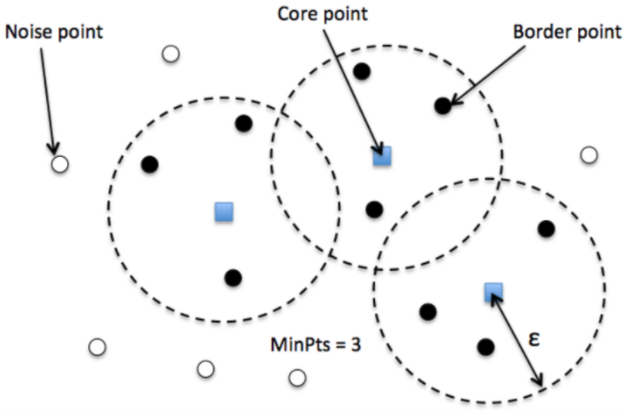

## Pros and Cons

|Advantages|Disadvantages|
|----------|-------------|
|Works well for data with outliers|Fails when regions have varying densities|
|Finds clusters with arbitrary shapes|Is non-deterministic when grouping certain points|
|Does not require a preset number of clusters|Does not work well with high-dimensional data|
|It does not require specifying the number of clusters|less efficient than other clustering methods for large datasets|

## Steps in DBSCAN

1. Find all neighbor points within eps and identify the core points

2. For each core point if it does not belong to a cluster create a new cluster

3. Recursively find all density-connected points and assign them to the same cluster.

4. Iterate through the remaining unvisited points. If they cannot be assigned to a cluster they are noise.

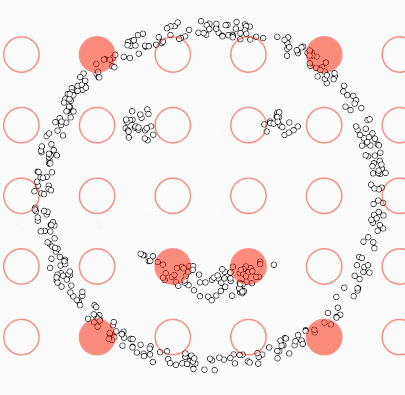

## DBSCAN Demo

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from google.colab import files
from IPython.display import Image
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Step 1-

# Here, we are creating a dataset with only 2 features for simpler visualization.
# PointsInCircle creates the data set ensuring the points form circles
# which takes the radius and number of data points as arguments
# and returns an array of data points which when plotted forms a circle.

np.random.seed(42)
# Function for creating datapoints in the form of a circle
def PointsInCircle(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Step 2-
# One circle won’t be sufficient to see the clustering ability of DBSCAN.
# There will be three circles of differing radii.
# There will also be noise added to the data as random points
# to show the effectiveness of DBSCAN

# Creating data points in the form of a circle
df1 = pd.DataFrame(PointsInCircle(500, 1000))
df2 = pd.DataFrame(PointsInCircle(300, 700))
df3 = pd.DataFrame(PointsInCircle(100, 300))


# Adding noise to the data set
noise = pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600))
                      for i in range(300)])

# Using concat to combine DataFrames
df = pd.concat([df1, df2, df3, noise], ignore_index=True)

print(df.head())

            0          1
0  484.891555 -31.006357
1  489.391178  21.973916
2  462.886575 -27.599889
3  517.218479   5.588090
4  455.669049   1.982181


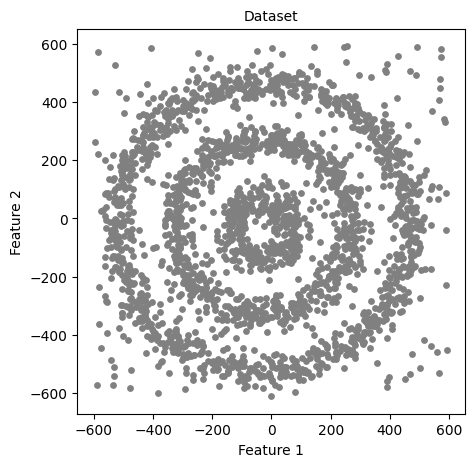

In [ ]:
# Step 3
# Plot all data points to see how they appear without any clustering

plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

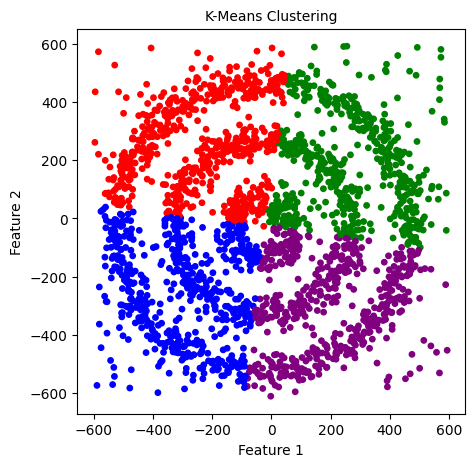

In [ ]:
# K-Means vs. Hierarchical vs. DBSCAN Clustering
# 1. K-Means
from sklearn.cluster import KMeans

k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])



# Plotting K Means
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

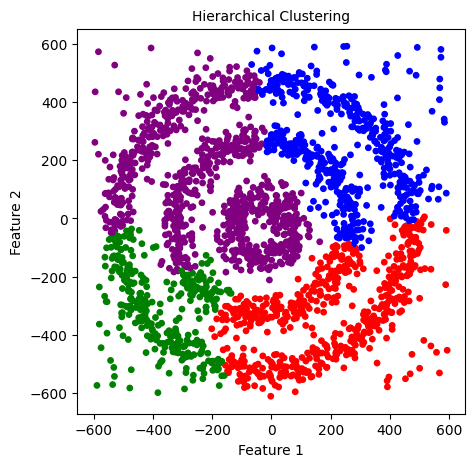

In [ ]:
# 2. Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])


# Plotting Hierarchical Clustering
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

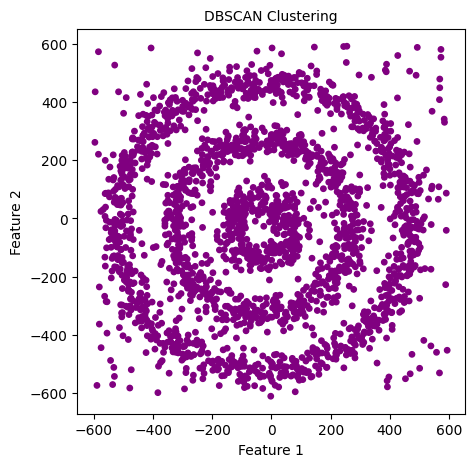

In [ ]:
# 3. DBSCAN
from sklearn.cluster import DBSCAN

dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

# Here, epsilon is 0.5, and min_samples or minPoints is 5.
# Let’s visualize the results from this model:


# DB Scan Plot
df['DBSCAN_labels']=dbscan.labels_

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

# All the data points are now of purple color which means they are treated as noise.
# It is because the value of epsilon is very small and we didn’t optimize parameters.
# Therefore, we need to find the value of epsilon and minPoints and then train our model again.

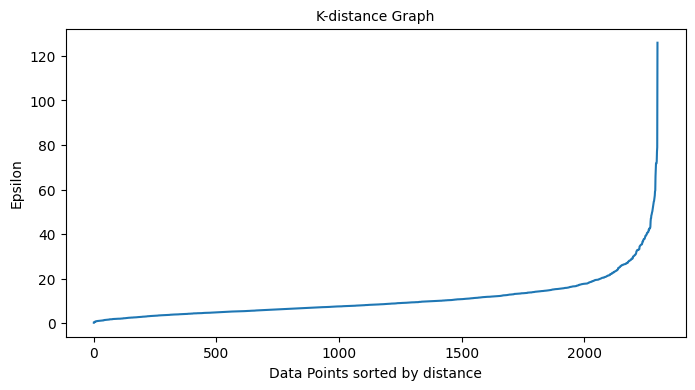

In [ ]:
# For epsilon, we can use the K-distance graph.
# For plotting a K-distance Graph, we need the distance between
# a point and its nearest data point for all data points in the dataset.
# We obtain this using NearestNeighbors from sklearn.neighbors.

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

# The distance variable contains an array of distances between a data point and
# its nearest data point for all data points in the dataset.

# Let’s plot our K-distance graph and find the value of epsilon.
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

In [ ]:
# The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph,
# which is 30 in this case.


# Try changing the parameter values to see how the results differ
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])


df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 0    1030
 1     730
 2     318
-1     222
Name: count, dtype: int64

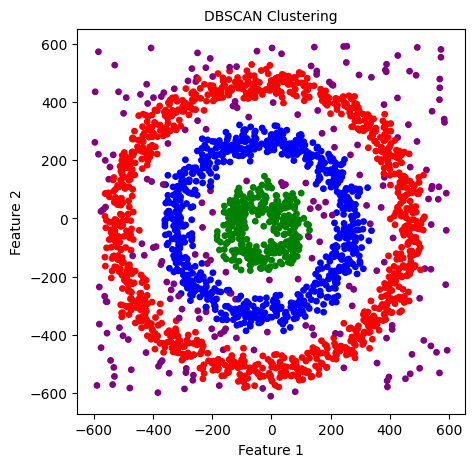

In [ ]:
# DBSCAN separates noise from the dataset pretty well.
# Here, 0, 1 and 2 are the three different clusters, and -1 is the noise.

# Plotting the resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

## Comparing DBSCAN and K-Means

In the demo above it was clear that DBSCAN was the more effective choice for analyzing the clusters. However there are plenty of scenarios where DBSCAN is not the best choice. The choice of algorithm depends on the need. For example DBSCAN identifies noise in data. If you are working with a dataset where nothing is considered noise to you and you would like all of the data to fit into some cluster than you would want something like K-Means to be sure every datapoint fits into some cluster.

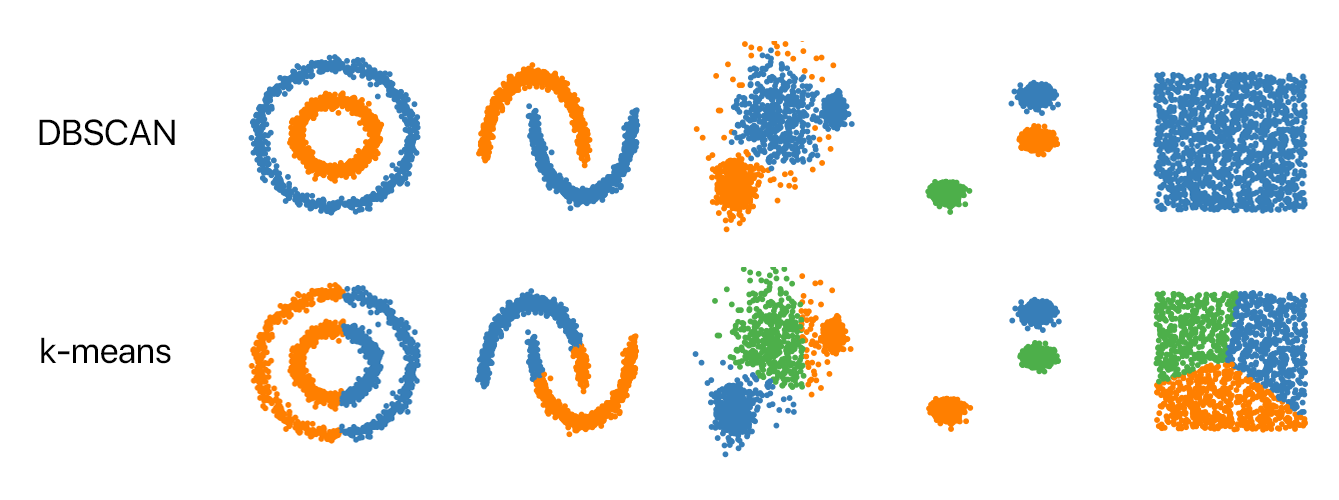

Differences between these algorithms:

*   DBSCAN is density-based and K-Means is centroid based
*   K-Means assumes clusters are spherical where as DBSCAN can identifty arbitrary cluster shapes
* DBSCAN is less sensitive to initialization than K-Means

When to use DBSCAN vs K-Means:

*   Use DBSCAN when the data has irregular shapes or when there is no prior knowledge of expected amounts of clusters

*   Use K-Means when the data has spherical shapes and a known amount of clusters
*   It doesn't hurt to try both algorithms to compare results and discover new information about a dataset

